boxplot the vegetation index change for different disturbance agents

In [1]:
import numpy as np
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker

# pwd = os.getcwd()
# rootpath = os.path.abspath(os.path.join(pwd, '../..'))
# path_pythoncode = join(rootpath, 'pythoncode')
# sys.path.append(path_pythoncode)

def vi_diff_boxplot(sheet_vi_change,
                    attribute_name,
                    labels=None,
                    position=None,
                    group_by='loss_agent',
                    x_label=' ',
                    y_label=' ',
                    showfliers=True,
                    y_limit=None,
                    title=None,):

    sns.set(style="darkgrid")
    plt.rcParams['font.family'] = 'Arial'

    figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(19, 14))

    x_tick_label_size = 42
    y_tick_label_size = 46
    axis_label_size = 40
    title_size = 28
    mean_point_marker_size = 18
    filter_point_marker_size = 16

    tick_length = 4
    axes_line_width = 2.0
    box_line_width = 3.5

    sns.boxplot(data=sheet_vi_change, x=sheet_vi_change[group_by], y=sheet_vi_change[attribute_name],
                order=position,
                boxprops=dict(linewidth=box_line_width),
                showmeans=True,
                whiskerprops=dict(linestyle='-', linewidth=box_line_width),
                medianprops=dict(linewidth=box_line_width),
                capprops=dict(linewidth=box_line_width),
                meanprops=dict(markersize=mean_point_marker_size,
                               markeredgecolor='black',
                               markerfacecolor='black',
                               marker='o', ),
                showfliers=showfliers,
                fliersize=filter_point_marker_size,
                width=0.65,
                )

    if labels is None:
        pass
    else:
        ax.set_xticks(ticks=np.arange(0, len(labels)), labels=labels)

    if attribute_name == 'delta_nbr':
        # plot the threshold line
        ax.axhline(y=0.05, color='#fe01b1', linestyle='--', linewidth=box_line_width + 0.5)
    if attribute_name == 'delta_kndvi':
        ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.05))

    ax.tick_params('x', labelsize=x_tick_label_size, direction='out', length=tick_length, width=axes_line_width, top=False, which='major', rotation=15)
    ax.tick_params('y', labelsize=y_tick_label_size, direction='out', length=tick_length, width=axes_line_width, left=True, which='major', rotation=0)

    ax.set_xlabel(x_label, size=axis_label_size)
    ax.set_ylabel(y_label, size=axis_label_size)

    ax.set_ylim(y_limit)
    ax.set_title(title, size=title_size)

    if attribute_name == 'delta_ndfi':
        plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.15)
    else:
        plt.tight_layout()
    plt.show()


(array(['Commission in change detection', 'Drought', 'Fire', 'Hurricane',
       'Landslide', 'Other, see the note', 'Tree-cutting'], dtype=object), array([12, 15, 13,  6,  5,  2, 39], dtype=int64))
NBR


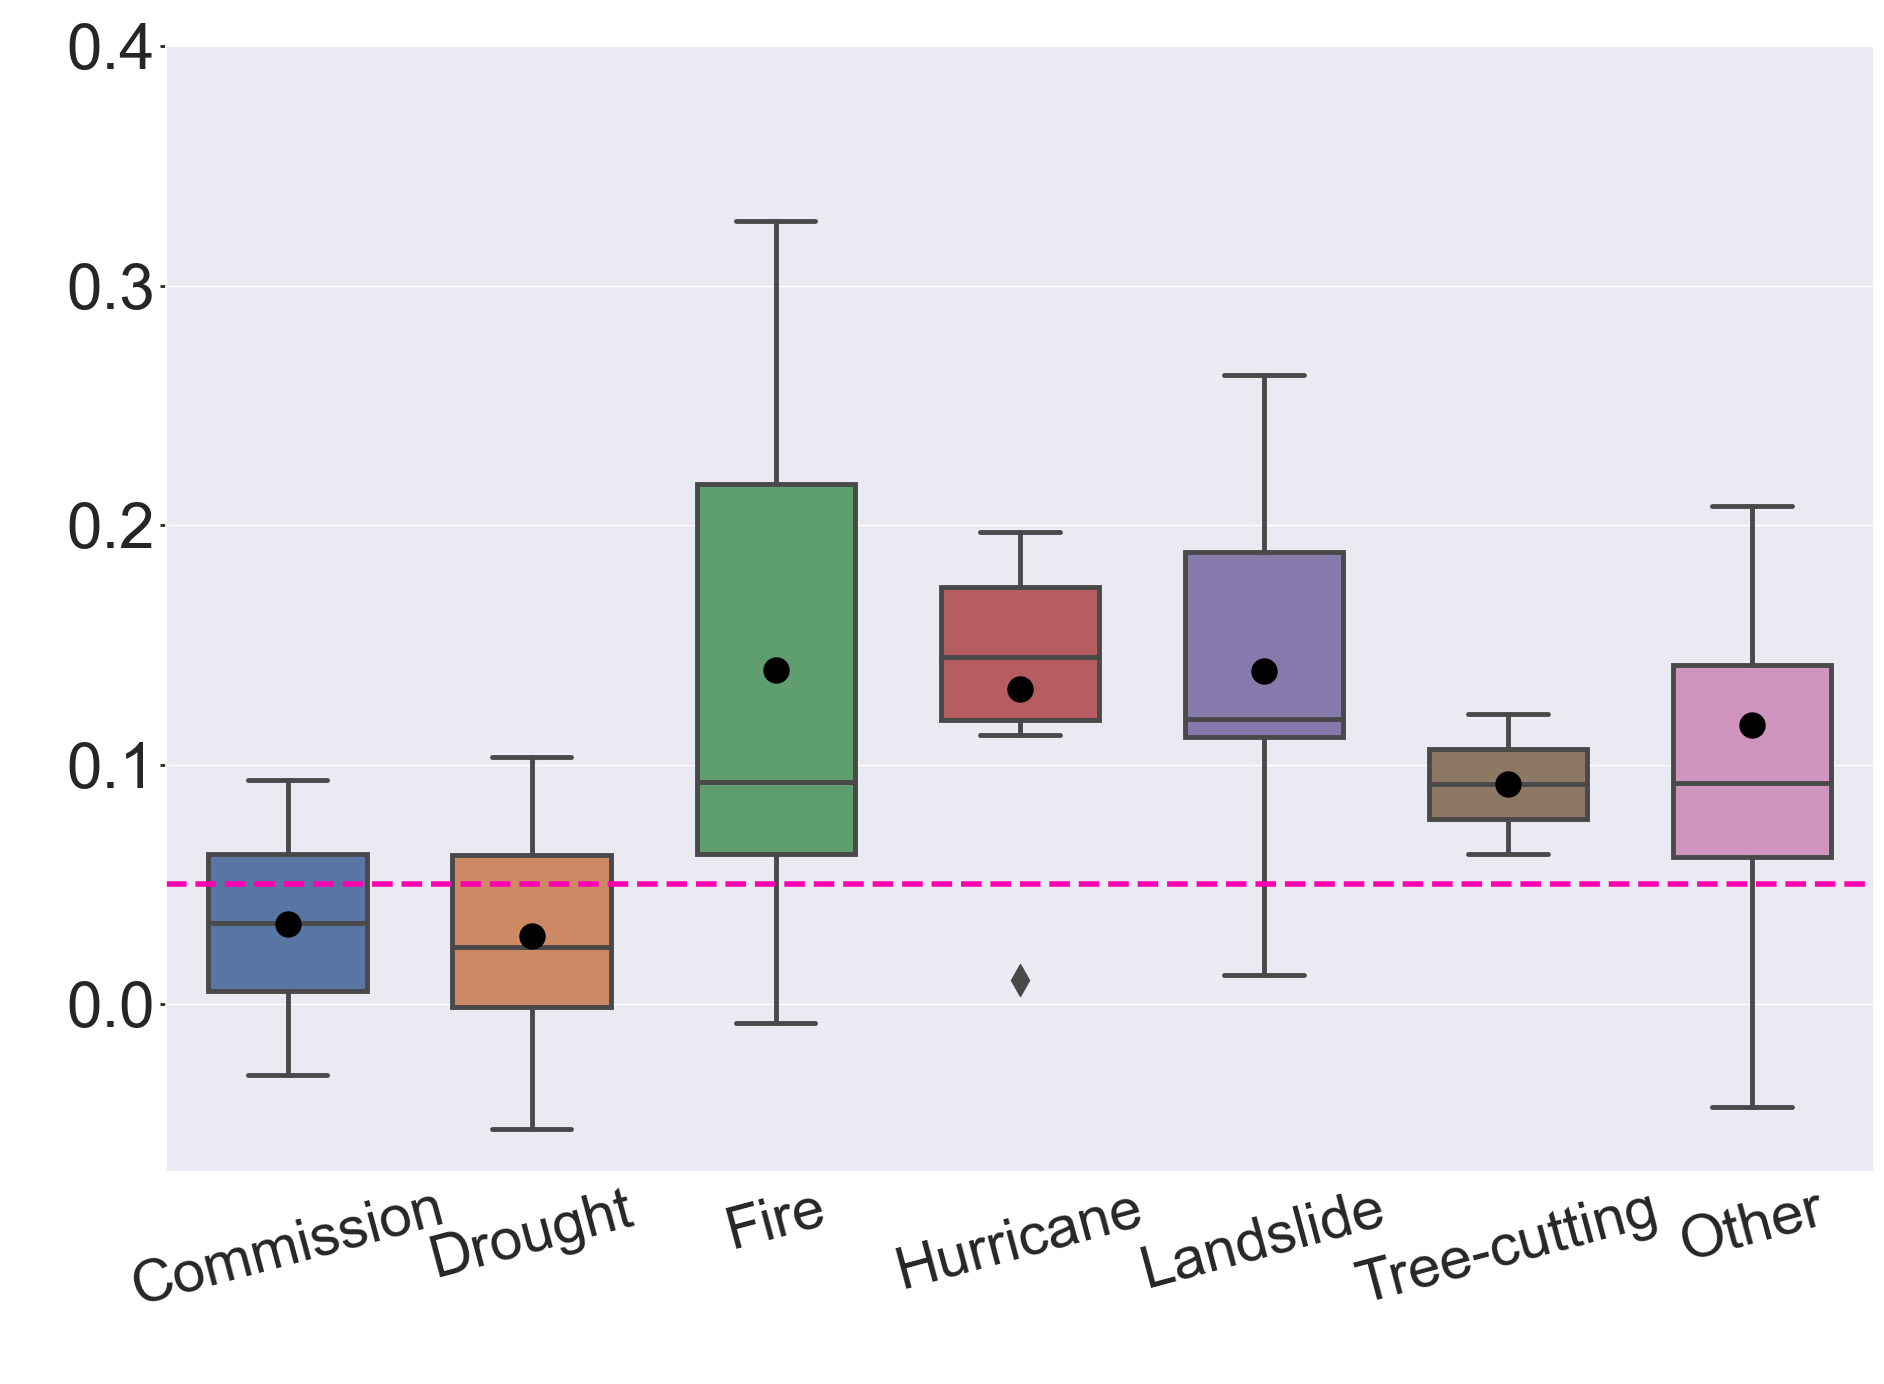

NDVI


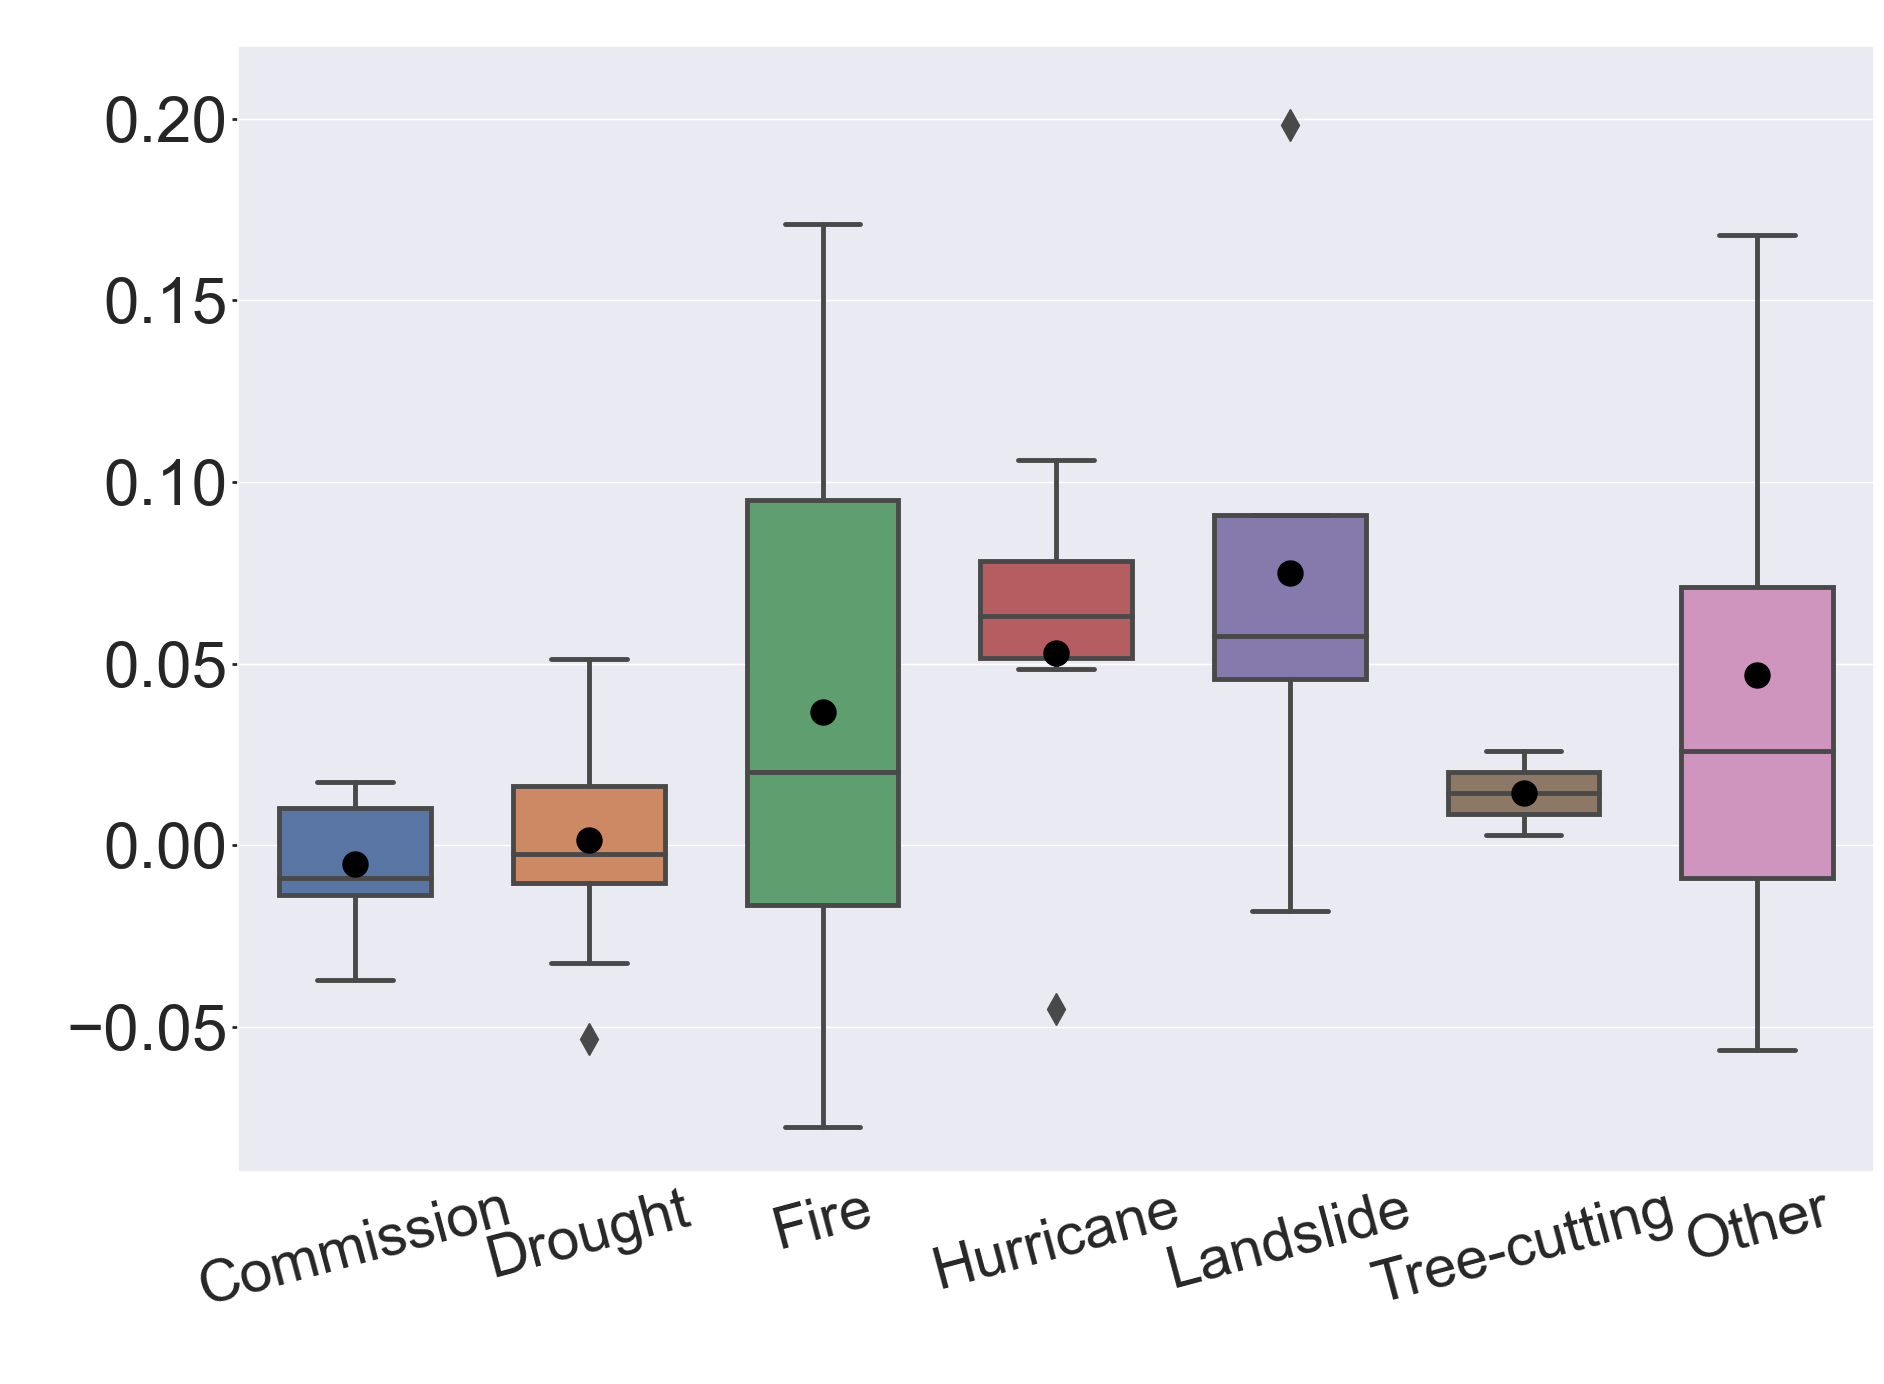

kNDVI


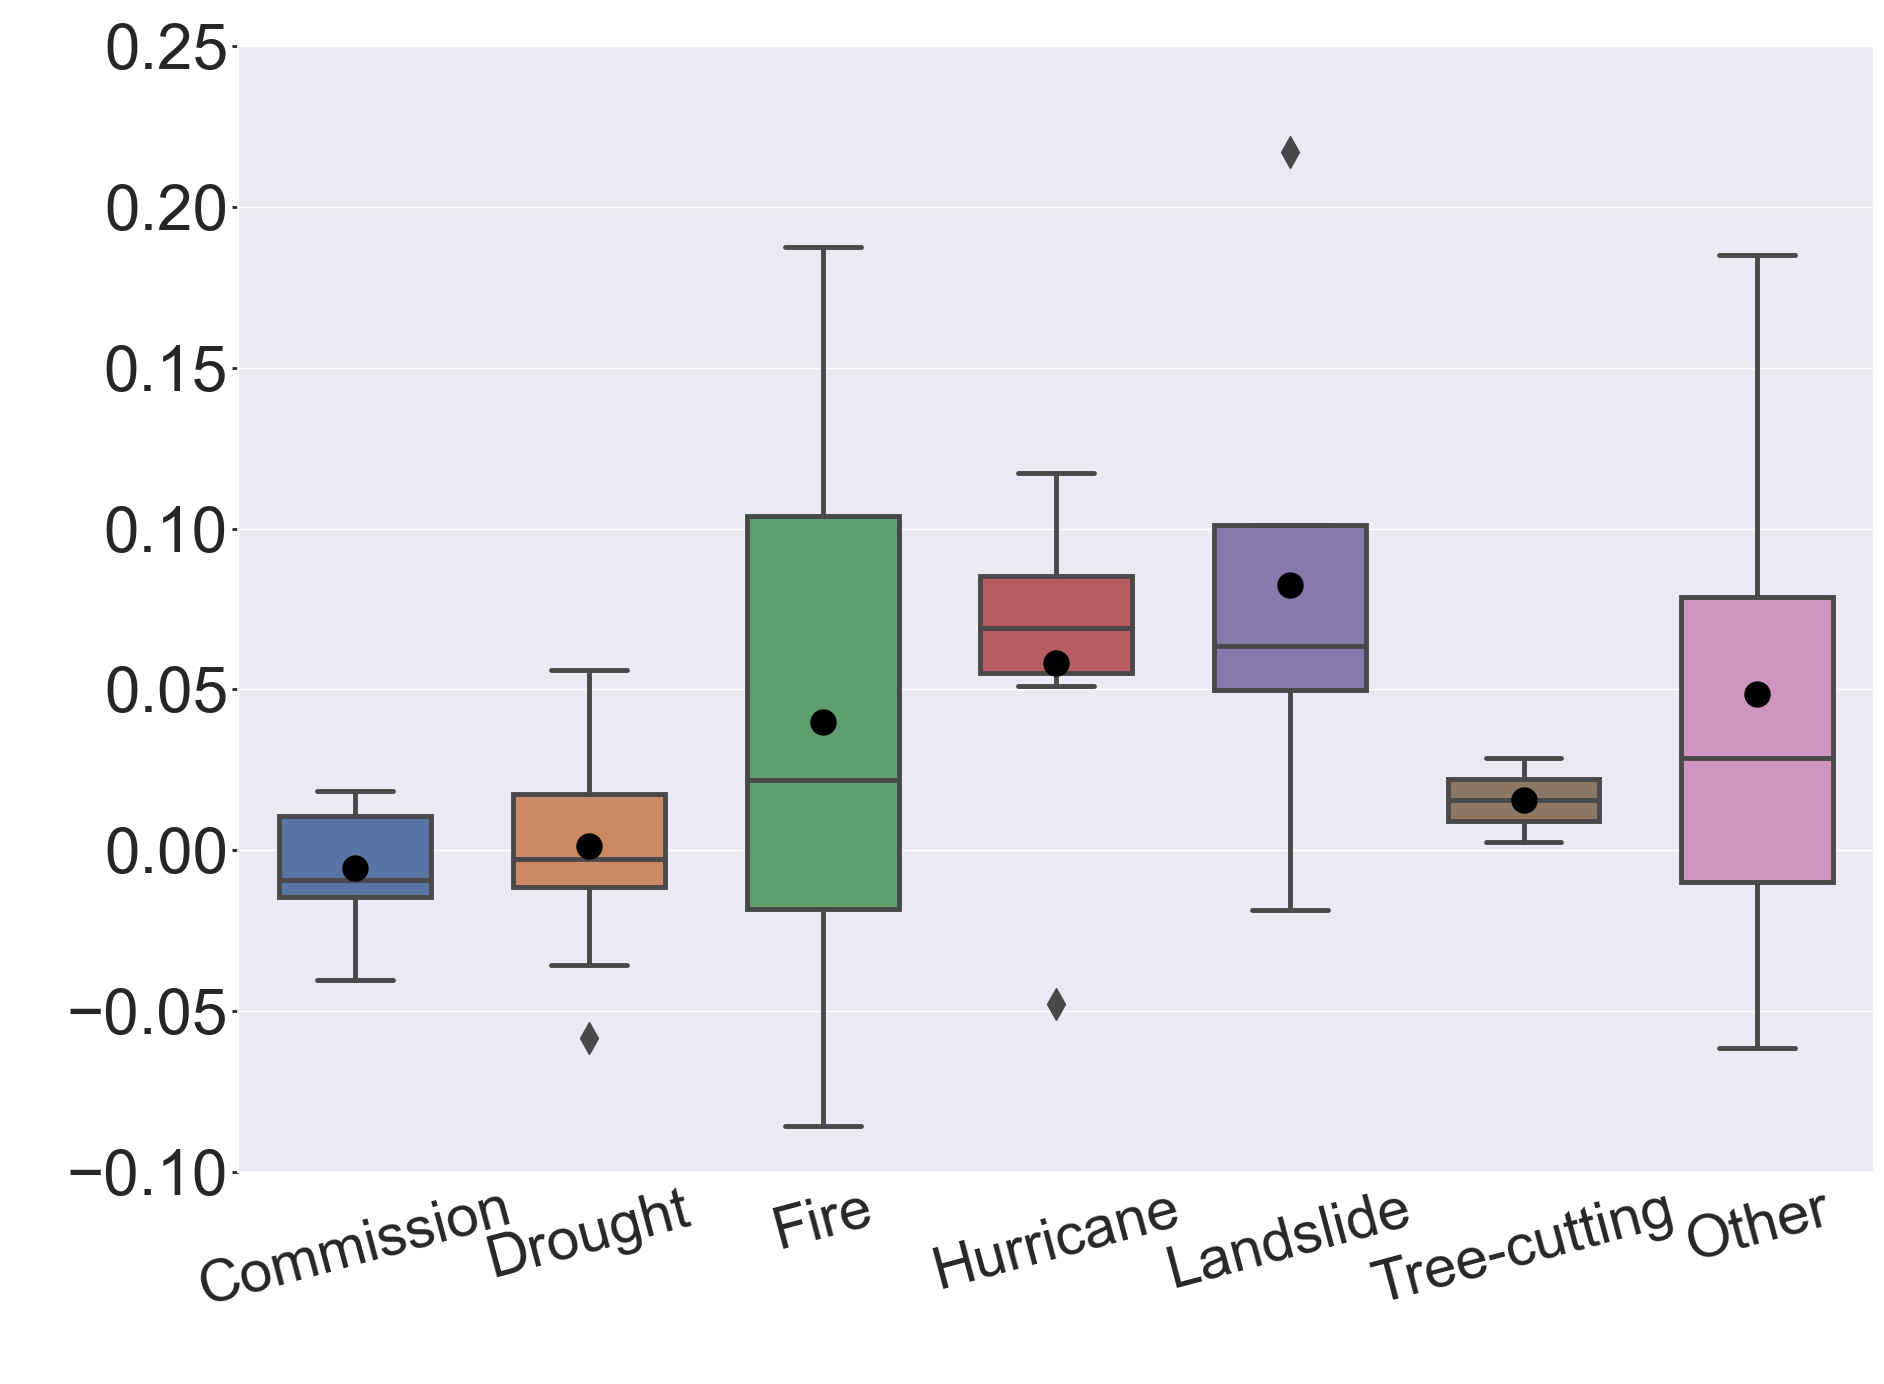

EVI


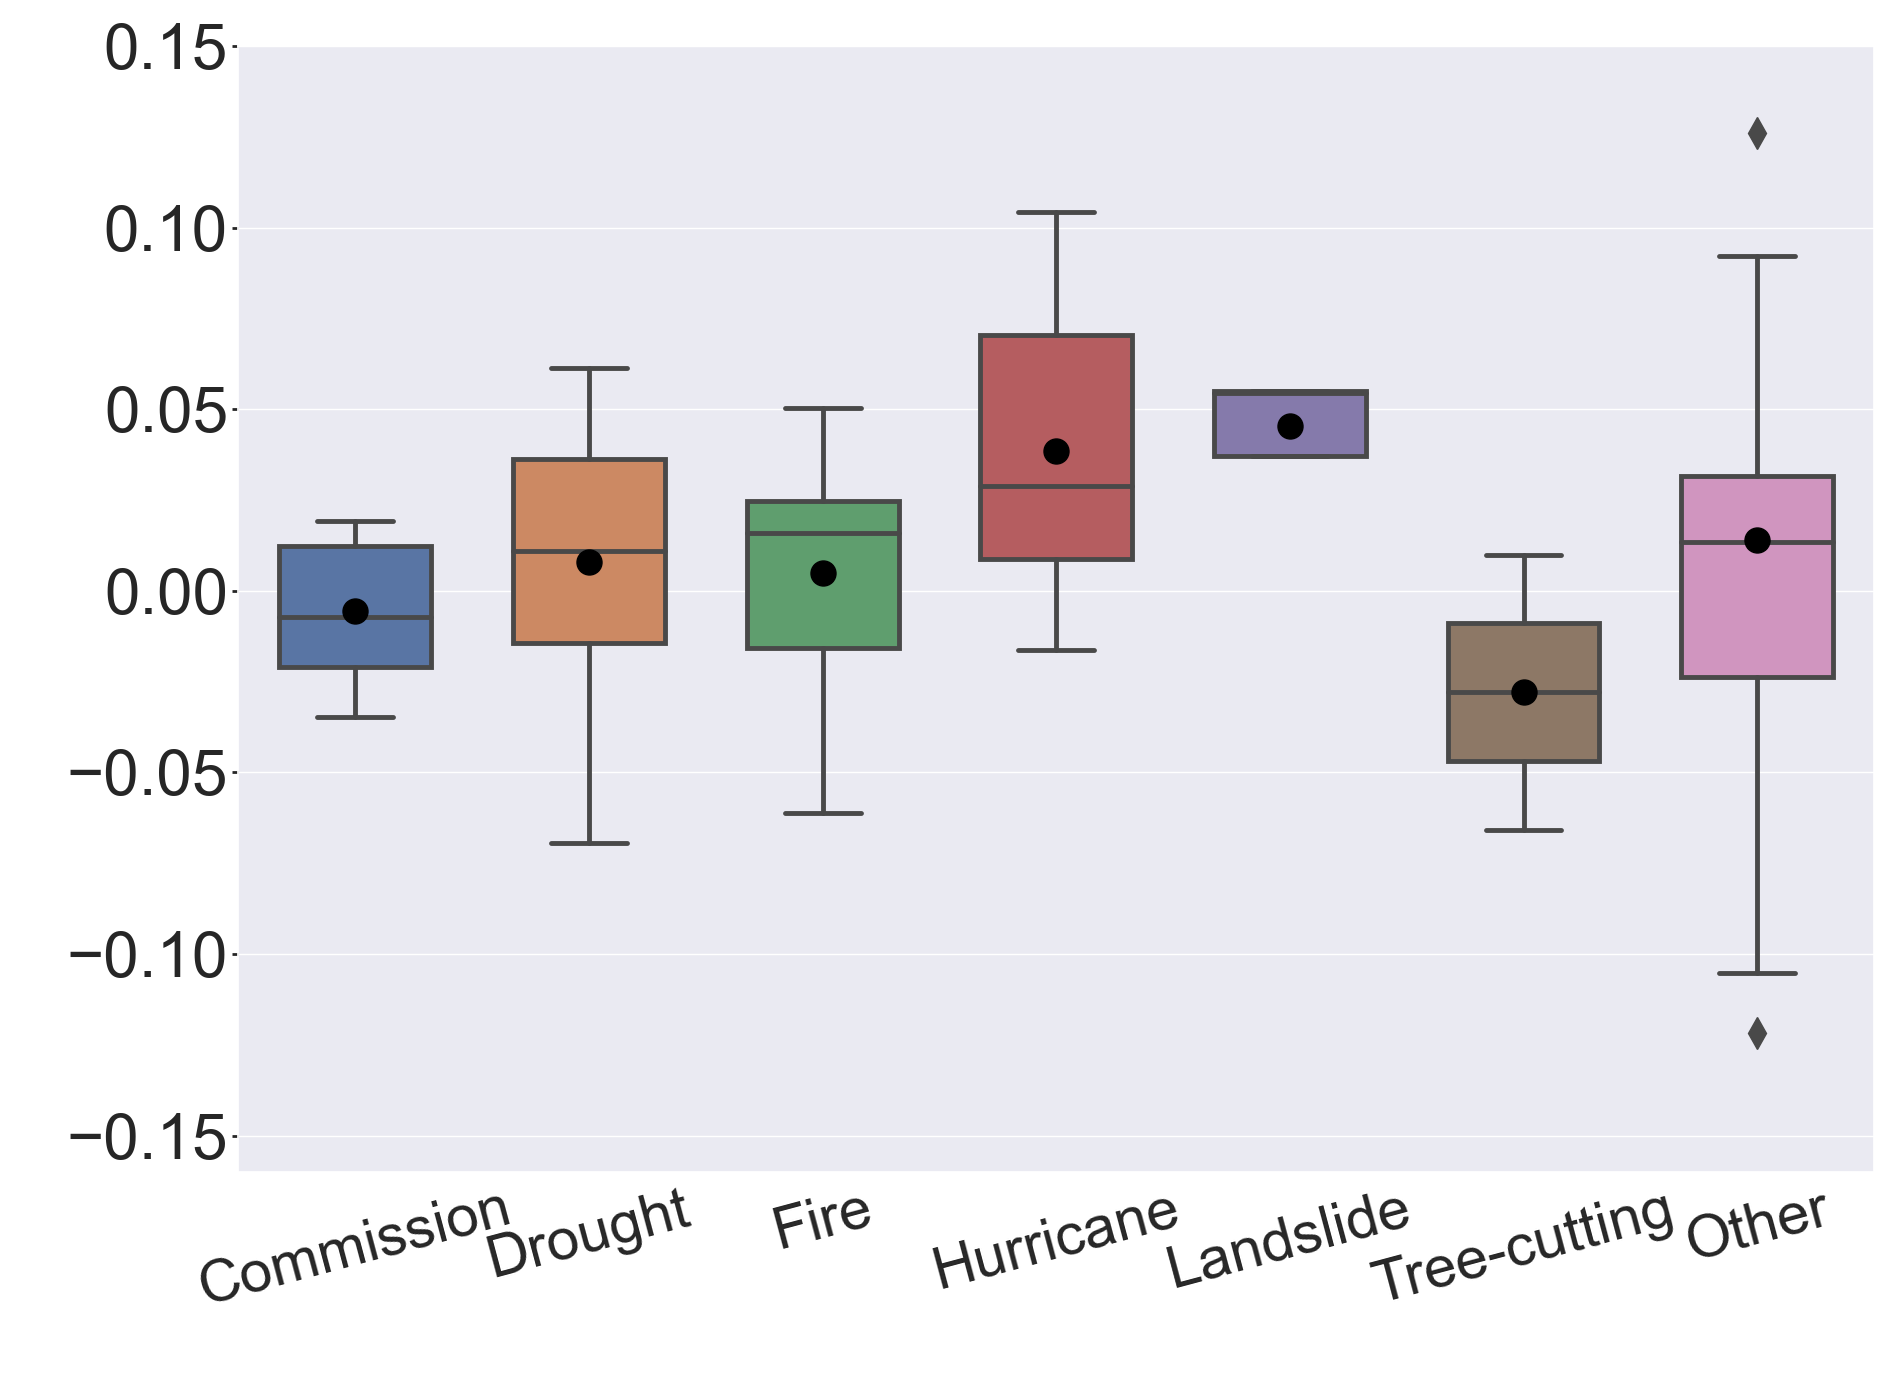

NDFI


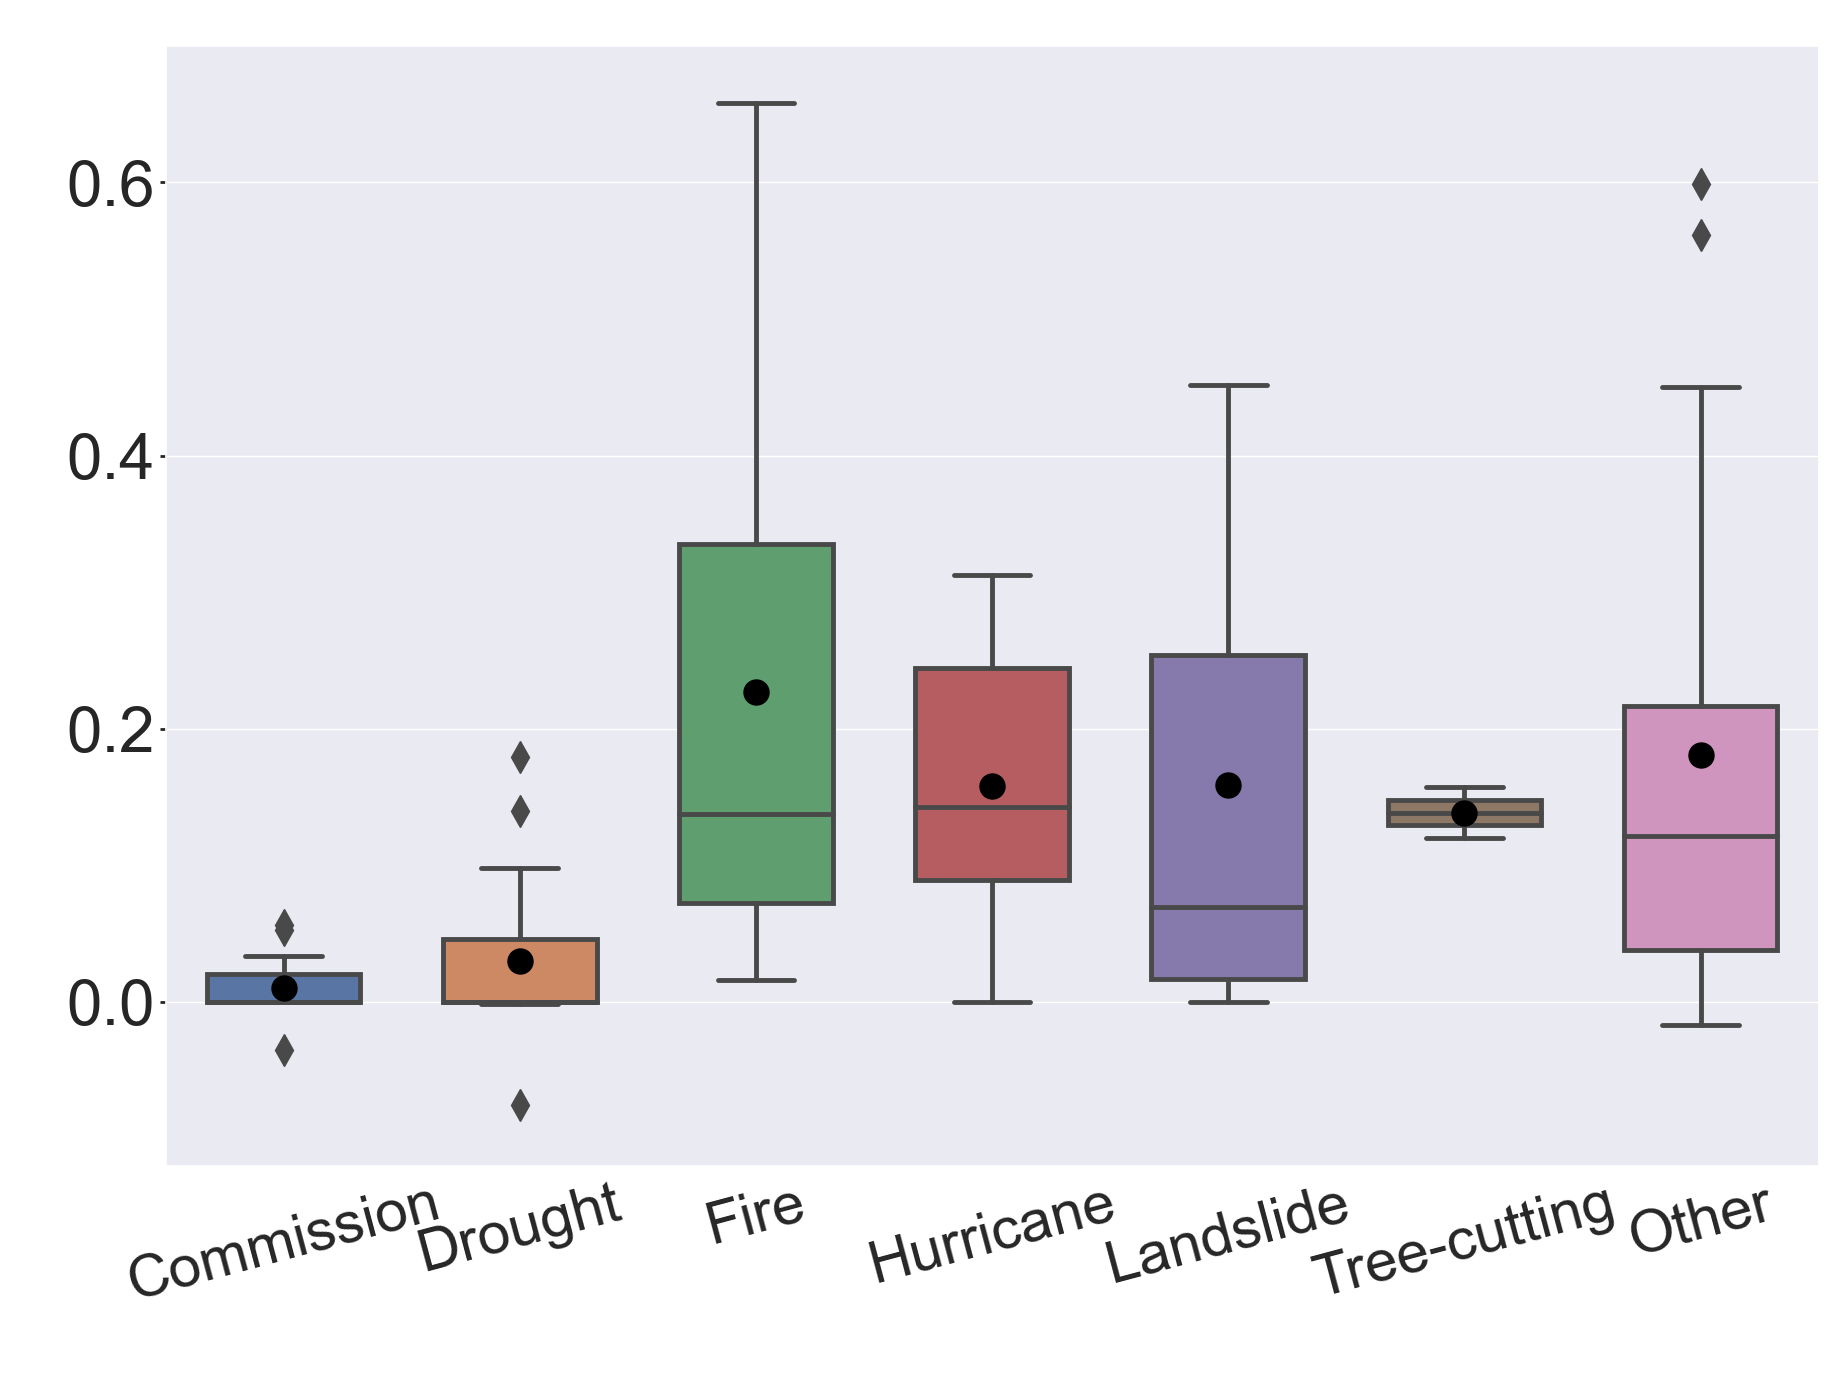

In [4]:
pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

filename = join(rootpath, 'data', 'vi_change_disturbance.xlsx')

df_before_after_vi_modification = pd.read_excel(filename)

list_loss_agent = np.unique(df_before_after_vi_modification['loss_agent'])
print(np.unique(df_before_after_vi_modification['loss_agent'], return_counts=True))

list_loss_agent_simplified = ['Commission', 'Drought', 'Fire', 'Hurricane', 'Landslide', 'Tree-cutting', 'Other']

print('NBR')
vi_diff_boxplot(df_before_after_vi_modification, attribute_name='delta_nbr', labels=list_loss_agent_simplified,
                position=list_loss_agent, title=' ', y_limit=[-0.07, 0.4],
                )
print('NDVI')
vi_diff_boxplot(df_before_after_vi_modification, attribute_name='delta_ndvi',
                labels=list_loss_agent_simplified, position=list_loss_agent, title=' ', y_limit=[-0.09, 0.22],
                )
print('kNDVI')                  
vi_diff_boxplot(df_before_after_vi_modification, attribute_name='delta_kndvi',
                labels=list_loss_agent_simplified, position=list_loss_agent, title=' ', y_limit=[-0.10, 0.25],
                )
print('EVI')
vi_diff_boxplot(df_before_after_vi_modification, attribute_name='delta_evi',
                labels=list_loss_agent_simplified, position=list_loss_agent, title=' ', y_limit=[-0.16, 0.15],
                )
print('NDFI')
vi_diff_boxplot(df_before_after_vi_modification, attribute_name='delta_ndfi',
                labels=list_loss_agent_simplified, position=list_loss_agent, title=' ', y_limit=[-0.12, 0.7],
                )
